#  Trees and Random Forests

**Author:**
[Anthony Strittmatter](http://www.anthonystrittmatter.com)

We analyse the browsing and online purchasing behaviour of households using [Comscore’s](https://www.comscore.com/) web browser data. The data ﬁle browser *2006.csv* contains 1,500 households that spent at least 1 US-dollar online in 2006. The variable *spend* is the online spending (in US-dollars) of a household. Furthermore, the data contains the browser history of households for the 1,000 most heavily trafficked websites (see the list of websites in browser-sites.txt). In particular, the data contains the percentage of time spent on speciﬁc websites from the total time spent online. Additionally, we have access to the ﬁle browser *new.csv*, which contains the browser history of 500 new households, but not the online spending.

## Data Preparation

Load the packages *rpart*, *rpart.plot*, *grf*, and *DiagrammeR*. Read the data sets *browser_2006.csv* and *browser_new.csv*. Generate matrices for the outcome, control, as well as id variables for both data sets.

In [1]:
########################  Load Packages and Data  ########################

# Load packages
library(rpart)
library(rpart.plot)
library(grf)
library(DiagrammeR)

# Load data
data_2006 <-read.csv("browser_2006.csv", sep = ",")
data_new <-read.csv("browser_new.csv", sep = ",")

# Data preparation
y_2006 <- as.matrix(data_2006[,2])
x_2006 <- as.matrix(data_2006[,c(3:ncol(data_2006))])
id_2006 <- as.matrix(data_2006[,1])
x_new <- as.matrix(data_new[,c(2:ncol(data_new))])
id_new <- as.matrix(data_new[,1])

print('Packages and data successfully loaded.')

#############################################################################

Warning message:
"package 'rpart.plot' was built under R version 3.6.3"Warning message:
"package 'grf' was built under R version 3.6.3"Warning message:
"package 'DiagrammeR' was built under R version 3.6.3"

[1] "Packages and data successfully loaded."


In [2]:
head(data_2006)

X,spend,atdmt.com,yahoo.com,whenu.com,weatherbug.com,msn.com,google.com,aol.com,questionmarket.com,...,ugo.com,cox.com,spicymint.com,real.com.o01,targetnet.com,effectivebrand.com,dallascowboys.com,leadgenetwork.com,in.us,vistaprint.com
1284,816,4.302353,6.631804,4.516282,0.02376991,0.0000000,3.9933444,0.02376991,1.354885,...,0.02376991,0,0.000000000,0.00000000,0.00000000,0,0,0.00000000,0.00000000,0.00000000
432,953,6.931292,13.379005,0.000000,0.00000000,4.1104171,2.5186379,0.34253476,2.075358,...,0.00000000,0,0.000000000,0.04029821,0.00000000,0,0,0.00000000,0.00000000,0.00000000
397,1633,8.168880,7.884250,1.337761,0.00000000,1.7836812,0.8823529,1.03415560,4.506641,...,0.00000000,0,0.009487666,0.02846300,0.00000000,0,0,0.00000000,0.00000000,0.00000000
50,233,8.960573,9.318996,0.000000,0.00000000,8.9605735,2.1505376,5.01792115,1.792115,...,0.00000000,0,0.000000000,0.00000000,0.00000000,0,0,0.00000000,0.00000000,0.00000000
1362,1154,4.621072,1.189926,0.000000,0.00000000,1.2707948,3.6044362,0.47365989,1.501848,...,0.04621072,0,0.011552680,0.00000000,0.03465804,0,0,0.01155268,0.03465804,0.01155268
921,188,13.429454,21.874356,0.000000,0.00000000,0.2059732,16.8486097,0.39134912,3.130793,...,0.00000000,0,0.000000000,0.00000000,0.00000000,0,0,0.00000000,0.00000000,0.00000000


## Exercise 1: Data Description

**a) How much is the average online spending in 2006?**

In [3]:
########################  Average Spending  ########################

spending <- round(mean(y_2006), digits=2)
print(paste0("In 2006, the average spending is ", spending, " US-dollars"))

####################################################################

[1] "In 2006, the average spending is 2064.6 US-dollars"


**b) Generate a variable for log online spendings. Plot the cumulative distribution of online spendings and log online spendings.**

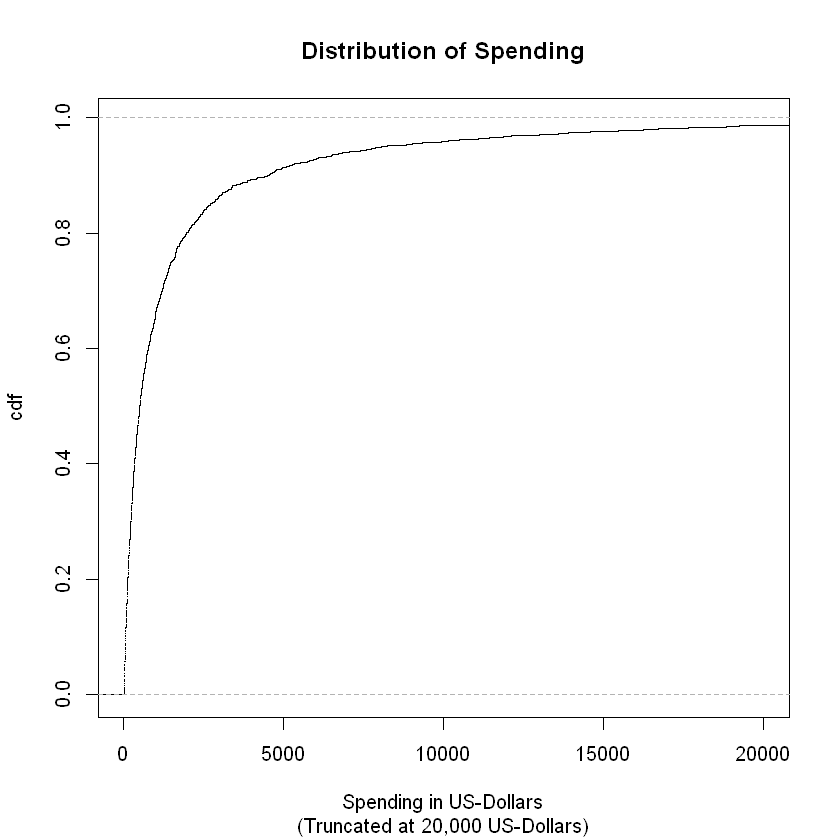

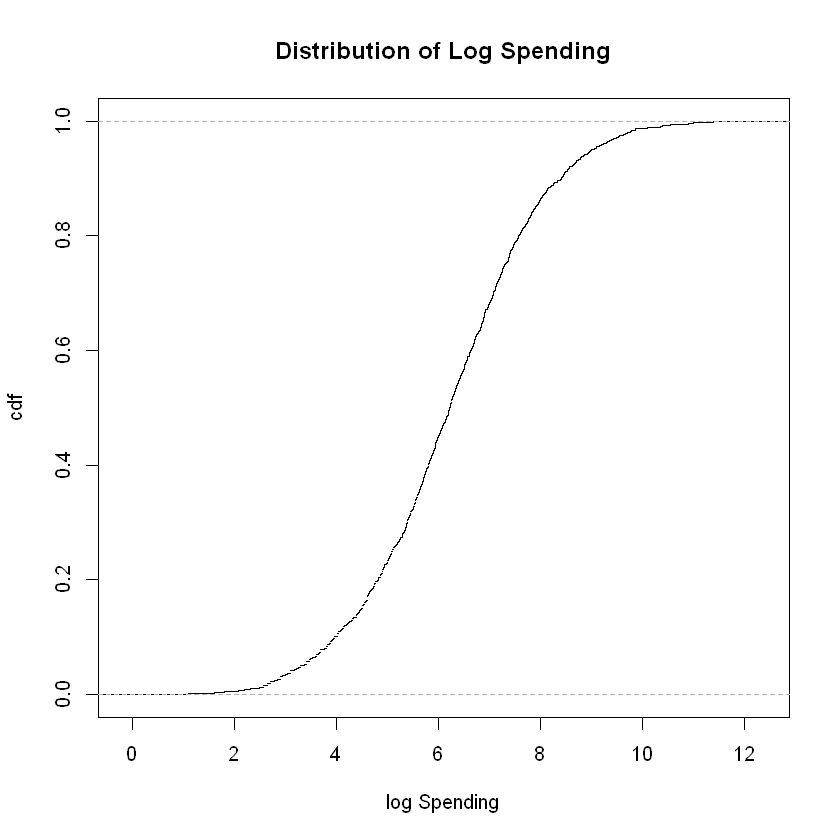

In [5]:
########################  Log Transformation  ########################

log_y_2006 = as.matrix(log(y_2006)) # take logarithm

# Cumulative Distribution of Spending
plot(ecdf(y_2006), xlab = "Spending in US-Dollars", sub = "(Truncated at 20,000 US-Dollars)",
     ylab = "cdf", main = "Distribution of Spending", xlim= c(0,20000))

# Cumulative Distribution of Log Spendiung
plot(ecdf(log_y_2006), xlab = "log Spending", ylab = "cdf", main = "Distribution of Log Spending")

#######################################################################

**c) Randomly partition the 2006 data into a training and estimation sample of equal size. For this purpose, generate a variable that indicates the rows that are included in the training sample (using the *sample* command).**

In [6]:
########################  Training and Test Samples  ########################

set.seed(1001)
# Generate variable with the rows in training data
size <- floor(0.5 * nrow(data_2006))
training_set <- sample(seq_len(nrow(data_2006)), size = size)

print('Training and test samples created.')

#############################################################################

[1] "Training and test samples created."


## Exercise 2: Trees

**a) Build in the training sample a shallow tree (terminal leaves should contain at least
150 observations) with the outcome log online spendings. Plot the structure of the
shallow tree.**

In [ ]:
########################  Shallow Tree  ########################

# Prepare data for tree estimator
outcome <- log_y_2006[training_set]
tree_data_2006 <-  data.frame(outcome, x_2006[training_set,])

# Build shallow tree
set.seed(1001)
shallow_tree <- rpart(formula = outcome ~., data = tree_data_2006, method = "anova", 
                             y = TRUE, control = rpart.control(xval = 10, cp = 0.00002, minbucket=150))
# Note: 'minbucket=150' imposes the restriction that each terminal leave should contain at least 150 observations. 
# The algorithm 'rpart' stops growing trees when either one leave has less than 150 observations or 
# the MSE gain of addidng one addidtional leave is below cp=0.00002.

## Plot tree structure
rpart.plot(shallow_tree,digits=3)

# bizrate.com
# fedex.com

################################################################

**b) Build in the training sample a deep tree (terminal leaves should contain at least
10 observations) with the outcome log online spendings. Plot the cross-validated MSE.**

In [ ]:
########################  Deep Tree  ########################
set.seed(1001)
deep_tree <- rpart(formula = outcome ~., data = tree_data_2006, ???)

print('Relative CV-MSE for different tree sizes')
print(deep_tree$cptable)

# Plot CV-MSE
plotcp(deep_tree)

#############################################################

**c) Determine the optimal number of terminal leaves.**

In [ ]:
########################  Optimal Tree Size  ########################

op.index <- which.min(deep_tree$cptable[, "xerror"])
op.size <- deep_tree$cptable[op.index, "nsplit"] +1
print(paste0("Optimal number final leaves: ", op.size))

#####################################################################

**d) Prune the deep tree and plot the structure of the pruned tree.**

In [ ]:
########################  Pruned Tree  ########################

# Select the Tree that Minimises CV-MSE 
# Get cp-value that corresponds to optimal tree size
cp.vals <- deep_tree$cptable[op.index, "CP"]

# Prune the deep tree
pruned_tree <- prune(???, cp = cp.vals)

## Plot tree structure
rpart.plot(pruned_tree,digits=3)

# aggregateknowledge.com

################################################################

**e) Calculate the $\mathbf{R^2}$ in the test sample.**

In [ ]:
########################  Out-of-Sample Performance  ########################

# Predict log online spending 
pred_tree <- predict(???, newdata= as.data.frame(x_2006))

# Test sample data
outcome_test <- log_y_2006[-training_set]
pred_tree_test  <- pred_tree[-training_set]

# R-squared
MSE_tree <- mean((outcome_test-pred_tree_test)^2)
r2_tree <-  round(1- MSE_tree/var(outcome_test), digits = 3) 
print(paste0("Test sample R-squared: ", r2_tree))

##############################################################################

## Exercise 3: Random Forests

**a) Build in the training sample a random forest to predict log online spending. The
forest should contain 1000 trees. Each tree should use a 50% subsample of the
training data, 1/3 of the covariates, and restrict the min.node.size to 100.**

In [ ]:
########################  Random Forest  ########################

rep <- 1000 # number of trees
cov <- 1/3 # share of covariates
frac <- 1/2 # fraction of subsample
min_obs <- 100 # max. size of terminal leaves in trees

# Build Forest
set.seed(10001)
forest1 <- regression_forest(x_2006[training_set,],log_y_2006[training_set,], 
                            mtry = floor(cov*ncol(x_2006)), sample.fraction = frac, num.trees = rep, 
                            min.node.size = min_obs, honesty=FALSE)

print('Forest is built.')

##################################################################

**b) Plot a tree of the forest.**

In [ ]:
########################  Plot Example Tree  ########################

# Plot a tree of the forest
# Just an illustration, overall the forest contains 1000 trees
tree <- get_tree(???,1) # here we select tree number 1
plot(tree)

#####################################################################

**c) Plot the variable importance. Why do we have to be cautious when interpreting
the variable importance?**

In [ ]:
########################  Variable Importance  ########################

# Plot the variable importantance
# First we consider only first split
imp1 <- variable_importance(forest1, max.depth = 1)
print(cbind(colnames(x_2006[,imp1>0.02]),imp1[imp1>0.02]))

# Now we consider the first four splits
imp2 <- round(variable_importance(forest1, decay.exponent = 2, max.depth = 4), digits = 3)
print(cbind(colnames(x_2006[,imp2>0.02]),imp2[imp2>0.02]))

########################################################################

**d) Use the forest to predict the online spendings in the test sample. Evaluate the
performance of the random forest using the $\mathbf{R^2}$.**

In [ ]:
########################  Out-of-Sample Performance  ########################

# Prediction
fit <- predict(???, newdata = x_2006[-training_set,])$predictions

# R-squared
SST <- mean(((log_y_2006[-training_set,])-mean((log_y_2006[-training_set,])))^2)
MSE1 <- mean(((log_y_2006[-training_set,])-fit)^2)
r2_1 <-  round(1- MSE1/SST, digits = 3) 
print(paste0("Test sample R-squared: ", r2_1))

#############################################################################

**e) Draw an area under the curve (AUC) graph with regard to the number of trees in
the forest.**

In [ ]:
########################  Area Under the Curve (AUC)  ########################

sizes <- c(1000,500,400,300, 200, 100, 50, 40,30,20,10, 5,4,3,2,1) # Select a grid of sample sizes
# Prepare matrix to store results
auc <- matrix(NA, nrow = length(sizes), ncol = 2)
colnames(auc) <- c("Trees", "AUC")
auc[,1] <- sizes
# Sum of Squares Total
SST <- mean(((log_y_2006[-training_set,])-(mean(log_y_2006[-training_set,])))^2)

set.seed(10001) # set starting value
for (t in sizes){
  # Estimate Forests
  forest <- regression_forest(x_2006[training_set,],(log_y_2006[training_set,]), mtry = floor(cov*ncol(x_2006)),
                              sample.fraction = frac, num.trees = t, min.node.size = min_obs, honesty=FALSE)
  fit <- predict(forest, newdata = x_2006[-training_set,])$predictions # prediction in test sample
  auc[auc[,1]== t,2] <- 1- mean(((log_y_2006[-training_set,])-fit)^2)/SST # store R-squared
}

# Marginal AUC
plot(auc[,1],auc[,2],type = "o",xlab="Trees", ylab= "R-squared", main = "AUC")


################################################################################

**f) Build a forest with smaller min.node.size (= 5) and test if this improves the $\mathbf{R^2}$
in the test sample.**

In [ ]:
########################  Deep Forest  ########################

min_obs <- 5
# Build Forest
forest2 <- regression_forest(x_2006[training_set,],log_y_2006[training_set,], 
                            ???)

# Prediction
fit <- predict(forest2, newdata = x_2006[-training_set,])$predictions

# R-squared
SST <- mean((log_y_2006[-training_set,]-mean(log_y_2006[-training_set,]))^2)
MSE2 <- mean((log_y_2006[-training_set,]-fit)^2)
r2_2 <-  round(1- MSE2/SST, digits = 3)
print(cbind(r2_1,r2_2))

# Plot tree
tree <- get_tree(forest2, 34)
plot(tree)

###############################################################

**g) Use the data browser new.csv, which contains the browsing behaviour of new potential customers. Predict the online spending in the new data using the prediction
model that performs best in the test sample. Download the id's and the predicted spendings of the new customers in a csv-file. These predictions might help you to
target marketing campaigns at the new potential customers with the highest (or
lowest) expected online spending.**

In [ ]:
########################  Store Prediction for Hold-out-Sample  ########################

# Hold-out-Sample Prediction
fit_new <- predict(???, newdata = x_new)$predictions

results <- as.matrix(cbind(id_new,fit_new)) # store ID's and predictions in oine matrix
colnames(results) <- c("id","predictions") # label columns

# Store results
write.csv(results, "predictions.csv")

print('Results for the hold-out-sample stored.')

#########################################################################################

**Useful links:**

* A description of the rpart package is here: [https://cran.r-project.org/web/packages/rpart/rpart.pdf](https://cran.r-project.org/web/packages/rpart/rpart.pdf).
*  A description of the grf package is here: [https://cran.r-project.org/web/packages/grf/grf.pdf](https://cran.r-project.org/web/packages/grf/grf.pdf).